# Overview

In this notebook, we provide an overview of publication medatata for CORD-19.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

# magics and warnings
%load_ext autoreload
%autoreload 2
import warnings; warnings.simplefilter('ignore')

import os, random, codecs, json
import pandas as pd
import numpy as np

seed = 99
random.seed(seed)
np.random.seed(seed)

import nltk, sklearn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2.5})

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# load publication metadata

df_meta = pd.read_csv("../cwts_covid/datasets_output/df_pub.csv",compression="gzip")

In [4]:
df_meta.head()

,pub_id,title,abstract,publication_year,publication_month,journal,volume,issue,pages,doi,pmid,pmcid,dimensions_id,timestamp
0,0,‘A ticking time bomb’: Scientists worry about ...,"CAPE TOWN, SOUTH AFRICA—Late on Sunday evening...",2020.0,NaN,Science,NaN,NaN,NaN,0.1126/science.abb7331,NaN,NaN,NaN,2020-04-18 09:20:24.986698
1,1,[Ten hot issues of breast cancer under the nov...,NaN,2020.0,2.0,Chinese medical journal,100,0,e002,10.0376/cma.j.issn.0376-2491.2020.0002,32036640.0,NaN,pub.1124777091,2020-04-18 09:20:24.986698
2,2,Another Piece of the Puzzle: Human Metapneumov...,BACKGROUND: Each winter respiratory viruses ac...,2008.0,12.0,Archives of Internal Medicine,NaN,NaN,NaN,10.1001/archinte.168.22.2489,19064834.0,pmc2783624,NaN,2020-04-18 09:20:24.986698
3,3,Viral etiology of severe pneumonia among Kenya...,CONTEXT: Pneumonia is the leading cause of chi...,2010.0,5.0,JAMA,NaN,NaN,NaN,10.1001/jama.2010.675,20501927.0,pmc2968755,NaN,2020-04-18 09:20:24.986698
4,4,Critically Ill Patients With Influenza A(H1N1)...,NaN,2014.0,4.0,JAMA,NaN,NaN,NaN,10.1001/jama.2014.2116,24566924.0,pmc6689404,NaN,2020-04-18 09:20:24.986698


In [5]:
df_meta.columns

Index(['pub_id', 'title', 'abstract', 'publication_year', 'publication_month',
       'journal', 'volume', 'issue', 'pages', 'doi', 'pmid', 'pmcid',
       'dimensions_id', 'timestamp'],
      dtype='object')

In [6]:
df_meta.shape

(61482, 14)

#### Publication years

In [7]:
import re

def clean_year(s):
    if pd.isna(s):
        return np.nan
    if not (s>1900):
        return np.nan
    elif s>2020:
        return 2020
    return s

df_meta["publication_year"] = df_meta["publication_year"].apply(clean_year)

In [8]:
df_meta.publication_year.describe()

count    61467.000000
mean      2012.434851
std          8.671299
min       1951.000000
25%       2009.000000
50%       2015.000000
75%       2020.000000
max       2020.000000
Name: publication_year, dtype: float64

## Dimensions

In [9]:
# load Dimensions data (you will need to download it on your own)

directory_name = "../cwts_covid/datasets_output/json_dimensions_cwts"

all_dimensions = list()
for root, dirs, files in os.walk(directory_name):
    for file in files:
        if ".json" in file:
            all_data = codecs.open(os.path.join(root,file)).read()
            for record in all_data.split("\n"):
                if record:
                    all_dimensions.append(json.loads(record))

In [10]:
#all_dimensions[0]

In [11]:
df_dimensions = pd.DataFrame.from_dict({
    "id":[r["id"] for r in all_dimensions],
    "year":[r["year"] for r in all_dimensions],
    "month":[int(r["publication_date"][5:7]) for r in all_dimensions],
    "publication_date":[r["publication_date"] for r in all_dimensions],
    "publication_type":[r["publication_type"] for r in all_dimensions],
    "doi":[r["doi"] for r in all_dimensions],
    "pmid":[r["pmid"] for r in all_dimensions],
    "issn":[r["journal"]["issn"] for r in all_dimensions],
    "times_cited":[r["times_cited"] for r in all_dimensions],
    "relative_citation_ratio":[r["relative_citation_ratio"] for r in all_dimensions],
    "for_top":[r["for"][0]["first_level"]["name"] if len(r["for"])>0 else "" for r in all_dimensions],
    "for_bottom":[r["for"][0]["second_level"]["name"] if len(r["for"])>0 else "" for r in all_dimensions]
})

In [12]:
df_dimensions.head()

,id,year,month,publication_date,publication_type,doi,pmid,issn,times_cited,relative_citation_ratio,for_top,for_bottom
0,pub.1117509804,2019,6,2019-06-26,article,10.1128/jvi.00490-19,31243130,0022-538X,0,NaN,Medical and Health Sciences,Medical Microbiology
1,pub.1117412644,2019,6,2019-06-26,article,10.1128/jvi.00714-19,31243124,0022-538X,0,NaN,Biological Sciences,Genetics
2,pub.1117412640,2019,6,2019-06-26,article,10.1128/jvi.00240-19,31243125,0022-538X,3,NaN,Medical and Health Sciences,Neurosciences
3,pub.1117509802,2019,6,2019-06-26,article,10.1128/jvi.00564-19,31243128,0022-538X,5,NaN,Biological Sciences,Genetics
4,pub.1117293115,2019,6,2019-06-19,article,10.1128/jvi.00505-19,31217243,0022-538X,1,NaN,Medical and Health Sciences,Medical Microbiology


In [13]:
df_dimensions.dtypes

id                          object
year                         int64
month                        int64
publication_date            object
publication_type            object
doi                         object
pmid                        object
issn                        object
times_cited                  int64
relative_citation_ratio    float64
for_top                     object
for_bottom                  object
dtype: object

In [14]:
# We only focus on publications with DOI or PMID since Altmetrics data is limited to those

In [15]:
df_dimensions.pmid = df_dimensions.pmid.astype(float)

In [16]:
df_dimensions.shape

(59457, 12)

In [17]:
df_joined_doi = df_meta[pd.notnull(df_meta.doi)].merge(df_dimensions[pd.notnull(df_dimensions.doi)], how="inner", suffixes=('','_y'), left_on="doi", right_on="doi", copy=False)

In [18]:
df_joined_doi.shape

(56144, 25)

In [19]:
df_joined_pmid = df_meta[pd.isnull(df_meta.doi) & pd.notnull(df_meta.pmid)].merge(df_dimensions[pd.isnull(df_dimensions.doi) & pd.notnull(df_dimensions.pmid)], how="inner", suffixes=('','_y'), left_on="pmid", right_on="pmid", copy=False)

In [20]:
df_joined_pmid.shape

(1052, 25)

In [21]:
df_joined = pd.concat([df_joined_doi,df_joined_pmid])
df_joined = df_joined[df_joined.columns.drop(["doi_y","pmid_y"])]

In [22]:
df_joined.head()

,pub_id,title,abstract,publication_year,publication_month,journal,volume,issue,pages,doi,...,id,year,month,publication_date,publication_type,issn,times_cited,relative_citation_ratio,for_top,for_bottom
0,1,[Ten hot issues of breast cancer under the nov...,NaN,2020.0,2.0,Chinese medical journal,100,0,e002,10.0376/cma.j.issn.0376-2491.2020.0002,...,pub.1124777091,2020,2,2020-02-10,article,0376-2491,0,NaN,,
1,2,Another Piece of the Puzzle: Human Metapneumov...,BACKGROUND: Each winter respiratory viruses ac...,2008.0,12.0,Archives of Internal Medicine,NaN,NaN,NaN,10.1001/archinte.168.22.2489,...,pub.1033454789,2008,12,2008-12-08,article,2168-6106,120,3.11,Medical and Health Sciences,Medical Microbiology
2,3,Viral etiology of severe pneumonia among Kenya...,CONTEXT: Pneumonia is the leading cause of chi...,2010.0,5.0,JAMA,NaN,NaN,NaN,10.1001/jama.2010.675,...,pub.1000272326,2010,5,2010-05-26,article,0098-7484,208,8.35,Medical and Health Sciences,Medical Microbiology
3,4,Critically Ill Patients With Influenza A(H1N1)...,NaN,2014.0,4.0,JAMA,NaN,NaN,NaN,10.1001/jama.2014.2116,...,pub.1008273195,2014,4,2014-04-02,article,0098-7484,17,0.76,,
4,5,"Prevalence of Depression, Depressive Symptoms,...",IMPORTANCE: Medical students are at high risk ...,2016.0,12.0,JAMA,NaN,NaN,NaN,10.1001/jama.2016.17324,...,pub.1002516735,2016,12,2016-12-06,article,0098-7484,339,37.44,Medical and Health Sciences,Public Health and Health Services


In [23]:
# Most publications are in Dimensions via DOI or PMID: we focus on these

In [24]:
df_joined.shape

(57196, 24)

In [25]:
df_joined.drop_duplicates("pub_id",inplace=True)

In [26]:
df_joined.shape

(55875, 24)

In [27]:
df_joined[df_joined.pub_id==29534]

,pub_id,title,abstract,publication_year,publication_month,journal,volume,issue,pages,doi,...,id,year,month,publication_date,publication_type,issn,times_cited,relative_citation_ratio,for_top,for_bottom
29718,29534,Clinical Characteristics of Covid-19 in China.,NaN,2020.0,3.0,New England Journal of Medicine,382,NaN,NaN,10.1056/nejmc2005203,...,pub.1125958251,2020,3,2020-03-27,article,0028-4793,4,NaN,,


In [28]:
df_meta.shape

(61482, 14)

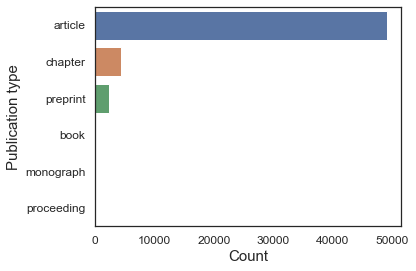

In [29]:
# publication type

df_sub = df_joined[df_joined.publication_type.isin(df_joined.publication_type.value_counts()[:10].index.tolist())]
b = sns.countplot(y="publication_type", data=df_sub, order=df_sub['publication_type'].value_counts().index)
#b.axes.set_title("Title",fontsize=50)
b.set_xlabel("Count",fontsize=15)
b.set_ylabel("Publication type",fontsize=15)
b.tick_params(labelsize=12)
plt.tight_layout()
#plt.savefig("figures/dim_pub_type.pdf")

#### Citation counts

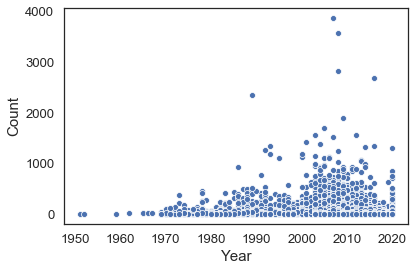

In [30]:
# scatter of citations vs time of publication

sns.scatterplot(df_joined.publication_year.to_list(),df_joined.times_cited.to_list())
plt.xlabel("Year", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.tight_layout()
#plt.savefig("figures/dim_citations_year.pdf")

In [31]:
# most cited papers

df_joined[["title","times_cited","relative_citation_ratio","journal","publication_year","doi"]].sort_values("times_cited",ascending=False).head(10)

,title,times_cited,relative_citation_ratio,journal,publication_year,doi
31071,Infectious Diseases Society of America/America...,3878,108.91,Clin Infect Dis,2007.0,10.1086/511159
23655,Epidemiology and causes of preterm birth,3572,118.32,The Lancet,2008.0,10.1016/s0140-6736(08)60074-4
27920,Global trends in emerging infectious diseases,2832,70.32,Nature,2008.0,10.1038/nature06536
30666,Guidelines for the use and interpretation of a...,2684,207.35,Autophagy,2016.0,10.1080/15548627.2015.1100356
23256,Biology of Natural Killer Cells,2361,47.85,Advances in Immunology,1989.0,10.1016/s0065-2776(08)60664-1
28204,Knocking down barriers: advances in siRNA deli...,1909,47.46,Nat Rev Drug Discov,2009.0,10.1038/nrd2742
14768,Antimicrobial activity of flavonoids,1708,35.02,International Journal of Antimicrobial Agents,2005.0,10.1016/j.ijantimicag.2005.09.002
23442,Coronavirus as a possible cause of severe acut...,1571,34.25,The Lancet,2003.0,10.1016/s0140-6736(03)13077-2
29742,Isolation of a novel coronavirus from a man wi...,1556,56.64,N Engl J Med,2012.0,10.1056/nejmoa1211721
10135,2007 Guideline for Isolation Precautions: Prev...,1516,36.68,American Journal of Infection Control,2007.0,10.1016/j.ajic.2007.10.007


In [32]:
# same but in 2020; note that duplicates are due to SI or pre-prints with different PMIDs

df_joined[df_joined.publication_year>2019][["title","times_cited","relative_citation_ratio","journal","publication_year","doi"]].sort_values("times_cited",ascending=False).head(10)

,title,times_cited,relative_citation_ratio,journal,publication_year,doi
23883,Clinical features of patients infected with 20...,1307,NaN,The Lancet,2020.0,10.1016/s0140-6736(20)30183-5
29749,A Novel Coronavirus from Patients with Pneumon...,865,NaN,New England Journal of Medicine,2020.0,10.1056/nejmoa2001017
29752,"Early Transmission Dynamics in Wuhan, China, o...",756,NaN,New England Journal of Medicine,2020.0,10.1056/nejmoa2001316
15,Clinical Characteristics of 138 Hospitalized P...,719,NaN,JAMA,2020.0,10.1001/jama.2020.1585
23888,Epidemiological and clinical characteristics o...,719,NaN,The Lancet,2020.0,10.1016/s0140-6736(20)30211-7
29753,Clinical Characteristics of Coronavirus Diseas...,513,NaN,New England Journal of Medicine,2020.0,10.1056/nejmoa2002032
28683,A pneumonia outbreak associated with a new cor...,501,NaN,Nature,2020.0,10.1038/s41586-020-2012-7
23882,A familial cluster of pneumonia associated wit...,493,NaN,The Lancet,2020.0,10.1016/s0140-6736(20)30154-9
23893,Genomic characterisation and epidemiology of 2...,416,NaN,The Lancet,2020.0,10.1016/s0140-6736(20)30251-8
29,Characteristics of and Important Lessons From ...,352,NaN,JAMA,2020.0,10.1001/jama.2020.2648


In [33]:
# most cited journals

df_joined[['journal','times_cited']].groupby('journal').sum().sort_values('times_cited',ascending=False).head(10)

,times_cited
journal,
Journal of Virology,78100
The Lancet,39051
PLoS One,35217
Proceedings of the National Academy of Sciences,35213
Virology,33802
Emerg Infect Dis,31672
Nature,22831
PLoS Pathog,19362
Journal of Clinical Microbiology,15942


## Altmetrics

In [34]:
directory_name = "../cwts_covid/datasets_output/json_altmetrics_cwts"

all_altmetrics = list()
for root, dirs, files in os.walk(directory_name):
    for file in files:
        if ".json" in file:
            all_altmetrics.append(json.loads(codecs.open(os.path.join(root,file)).read()))

In [35]:
#all_altmetrics[1]

In [36]:
len(all_altmetrics)

39117

In [37]:
df_altmetrics = pd.DataFrame.from_dict({
    "altmetric_id":[r["altmetric_id"] if "altmetric_id" in r.keys() else None for r in all_altmetrics],
    "counts_mendeley":[r["counts"]["readers"]["mendeley"] if "readers" in r["counts"].keys() else 0 for r in all_altmetrics],
    "counts_news":[r["counts"]["news"]["posts_count"] if "news" in r["counts"].keys() else 0 for r in all_altmetrics],
    "counts_blogs":[r["counts"]["blogs"]["posts_count"] if "blogs" in r["counts"].keys() else 0 for r in all_altmetrics],
    "counts_facebook":[r["counts"]["facebook"]["posts_count"] if "facebook" in r["counts"].keys() else 0 for r in all_altmetrics],
    "counts_policy":[r["counts"]["policy"]["posts_count"] if "policy" in r["counts"].keys() else 0 for r in all_altmetrics],
    "counts_wikipedia":[r["counts"]["wikipedia"]["posts_count"] if "wikipedia" in r["counts"].keys() else 0 for r in all_altmetrics],
    "counts_twitter_count":[r["counts"]["twitter"]["posts_count"] if "twitter" in r["counts"].keys() else 0 for r in all_altmetrics],
    "counts_twitter_unique":[r["counts"]["twitter"]["unique_users_count"] if "twitter" in r["counts"].keys() else 0 for r in all_altmetrics],
    "counts_total":[r["counts"]["total"]["posts_count"] if "total" in r["counts"].keys() else 0 for r in all_altmetrics],
    "doi":[r["citation"]["doi"] if "doi" in r["citation"] else None for r in all_altmetrics],
    "pmid":[r["citation"]["pmid"] if "pmid" in r["citation"] else None for r in all_altmetrics],
    "year":[int(r["citation"]["pubdate"][:4]) if "pubdate" in r["citation"] else None for r in all_altmetrics],
    "title":[r["citation"]["title"] if "title" in r["citation"] else None for r in all_altmetrics],
    #"abstract":[r["citation"]["abstract"] if "abstract" in r["citation"] else None for r in all_altmetrics],
    "altmetric_score":[r["altmetric_score"]["score"] for r in all_altmetrics],
    "member_of_the_public":[r["demographics"]["poster_types"]["member_of_the_public"] if "demographics" in r.keys() and isinstance(r["demographics"],dict) and "poster_types" in r["demographics"].keys() and "member_of_the_public" in r["demographics"]["poster_types"].keys() else 0 for r in all_altmetrics],
    "researcher":[r["demographics"]["poster_types"]["researcher"] if "demographics" in r.keys() and isinstance(r["demographics"],dict) and "poster_types" in r["demographics"].keys() and "researcher" in r["demographics"]["poster_types"].keys() else 0 for r in all_altmetrics],
    "practitioner":[r["demographics"]["poster_types"]["practitioner"] if "demographics" in r.keys() and isinstance(r["demographics"],dict) and "poster_types" in r["demographics"].keys() and "practitioner" in r["demographics"]["poster_types"].keys() else 0 for r in all_altmetrics],
    "science_communicator":[r["demographics"]["poster_types"]["science_communicator"] if "demographics" in r.keys() and isinstance(r["demographics"],dict) and "poster_types" in r["demographics"].keys() and "science_communicator" in r["demographics"]["poster_types"].keys() else 0 for r in all_altmetrics]
})

# note: at the moment, only 50 abstracts are in Altmetrics and not in df_meta (of which 4 of papers in_wikipedia). Not worth it to integrate them, but check again in the future.

In [38]:
df_altmetrics.shape

(39117, 19)

In [39]:
df_altmetrics['counts_mendeley'] = df_altmetrics['counts_mendeley'].astype(float)

In [40]:
# aggregate possible duplicates by summing their values up

df_altmetrics_aggr = df_altmetrics[['altmetric_id', 'counts_mendeley', 'counts_news', 'counts_blogs',
       'counts_facebook', 'counts_policy', 'counts_wikipedia',
       'counts_twitter_count', 'counts_twitter_unique', 'counts_total', 'altmetric_score', 'member_of_the_public',
       'researcher', 'practitioner', 'science_communicator']].groupby("altmetric_id").agg('sum')

In [41]:
df_altmetrics = df_altmetrics[['altmetric_id', 'doi',
       'pmid', 'year', 'title']].merge(df_altmetrics_aggr, how="inner", left_on="altmetric_id", right_on="altmetric_id")

In [42]:
df_altmetrics.drop_duplicates('altmetric_id',inplace=True)

In [43]:
df_altmetrics.shape

(36584, 19)

In [44]:
df_altmetrics[df_altmetrics.doi=="10.1086/511159"]

,altmetric_id,doi,pmid,year,title,counts_mendeley,counts_news,counts_blogs,counts_facebook,counts_policy,counts_wikipedia,counts_twitter_count,counts_twitter_unique,counts_total,altmetric_score,member_of_the_public,researcher,practitioner,science_communicator
25107,390412.0,10.1086/511159,17278083,2007.0,Infectious Diseases Society of America/America...,3472.0,12,16,2,4,8,52,48,95,140.444,35,2,10,1


In [45]:
#all_altmetrics[26239]

In [46]:
df_altmetrics.head()

,altmetric_id,doi,pmid,year,title,counts_mendeley,counts_news,counts_blogs,counts_facebook,counts_policy,counts_wikipedia,counts_twitter_count,counts_twitter_unique,counts_total,altmetric_score,member_of_the_public,researcher,practitioner,science_communicator
0,44518982.0,10.1128/aem.00551-18,29625986,2018.0,Survival of the Enveloped Virus Phi6 in Drople...,32.0,1,1,0,0,0,9,4,11,18.58,4,0,0,0
1,37036429.0,10.1186/s13287-018-0774-8,29378639,2018.0,Mesenchymal stem cell-derived extracellular ve...,50.0,0,0,0,0,0,0,0,0,0.00,0,0,0,0
2,1121449.0,10.1128/jvi.02476-12,23236062,2013.0,"Sequencing, Annotation, and Characterization o...",60.0,0,0,1,0,0,3,3,6,5.25,2,1,0,0
3,78530289.0,10.2174/1871523019999200228100917,32213152,2020.0,Are there any Therapeutic Options Currently Av...,0.0,0,0,0,0,0,1,1,1,0.25,1,0,0,0
4,13617964.0,10.1016/j.chom.2009.05.012,19527883,2009.0,"Ubiquitination, Ubiquitin-like Modifiers, and ...",152.0,0,0,0,0,1,0,0,1,3.00,0,0,0,0


In [47]:
# Extract Wikipedia data frames
from datetime import date
#>>> date.fromisoformat('2019-12-04')

dois = list()
altmetric_ids = list()
wikipedia_ids = list()
wikipedia_titles = list()
wikipedia_urls = list()
wikipedia_langs = list()
wikipedia_summaries = list()
wikipedia_postedons = list()

for a in all_altmetrics:
    if "counts" in a.keys():
        if "wikipedia" in a["counts"].keys():
            for w in a["posts"]["wikipedia"]:
                try:
                    if "doi" in a["citation"].keys():
                        dois.append(a["citation"]["doi"])
                    else:
                        dois.append(None)
                    altmetric_ids.append(a["altmetric_id"])
                    wiki_id = w["page_url"].split("curid=")[-1]
                    wikipedia_ids.append(wiki_id)
                    wikipedia_titles.append(w["title"])
                    wikipedia_urls.append(w["page_url"])
                    wikipedia_langs.append(w["wiki_lang"])
                    if "summary" in w.keys():
                        wikipedia_summaries.append(w["summary"])
                    else:
                        wikipedia_summaries.append("")
                    wikipedia_postedons.append(date.fromisoformat(w["posted_on"].split("T")[0]))
                except:
                    print(w)
                    continue

In [48]:
len(wikipedia_ids)

3262

In [49]:
df_wikipedia = pd.DataFrame.from_dict({
    "wikipedia_id": wikipedia_ids,
    "title": wikipedia_titles,
    "page_url": wikipedia_urls,
    "lang": wikipedia_langs,
    "summary": wikipedia_summaries
})

In [50]:
df_wikipedia = df_wikipedia.groupby('wikipedia_id').first()
df_wikipedia.reset_index(inplace=True)

In [51]:
df_wikipedia.shape

(1579, 5)

In [52]:
df_wikipedia.head()

,wikipedia_id,title,page_url,lang,summary
0,10008283,Basigin,http://en.wikipedia.org/?curid=10008283,en,Basigin (BSG) also known as extracellular matr...
1,10012786,Pelargonium sidoides,http://en.wikipedia.org/?curid=10012786,en,Pelargonium sidoides is a medicinal plant nati...
2,10044864,Research question,http://en.wikipedia.org/?curid=10044864,en,A research question is the objective of a stud...
3,1006597,Nanorobotics,http://en.wikipedia.org/?curid=1006597,en,Nanorobotics is an emerging technology field c...
4,10071675,Civet,http://en.wikipedia.org/?curid=10071675,en,"A civet is a small, lean, mostly nocturnal mam..."


In [53]:
def to_ym(d):
    if d.month < 10:
        return str(d.year)+"-0"+str(d.month)
    return str(d.year)+"-"+str(d.month)

df_alt_to_wiki = pd.DataFrame.from_dict({
    "doi": dois,
    "altmetric_id": altmetric_ids,
    "wikipedia_id": wikipedia_ids,
    "posted_on": wikipedia_postedons,
    "posted_on_year": [d.year for d in wikipedia_postedons],
    "posted_on_month": [d.month for d in wikipedia_postedons],
    "posted_on_ym": [to_ym(d) for d in wikipedia_postedons]
})

In [54]:
df_alt_to_wiki.shape

(3262, 7)

In [55]:
df_alt_to_wiki.drop_duplicates(inplace=True)

In [56]:
df_alt_to_wiki.shape

(3133, 7)

In [57]:
df_alt_to_wiki.head()

,doi,altmetric_id,wikipedia_id,posted_on,posted_on_year,posted_on_month,posted_on_ym
0,10.1016/j.chom.2009.05.012,13617964,46181852,2016-11-15,2016,11,2016-11
1,10.1007/s40262-015-0364-1,5028631,43478312,2016-07-21,2016,7,2016-07
2,10.1016/s0378-1119(02)01056-9,3414235,4387438,2008-09-12,2008,9,2008-09
3,10.1016/s0378-1119(02)01056-9,3414235,30625026,2014-09-09,2014,9,2014-09
4,10.1098/rsif.2009.0384,13548930,1649692,2020-04-13,2020,4,2020-04


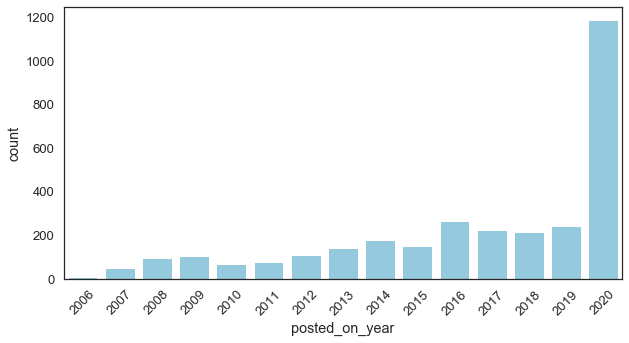

In [58]:
# year posted_on actions histogram

plt.figure(figsize=(10,5))
chart = sns.countplot(x="posted_on_year", data=df_alt_to_wiki, color="skyblue")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.show()

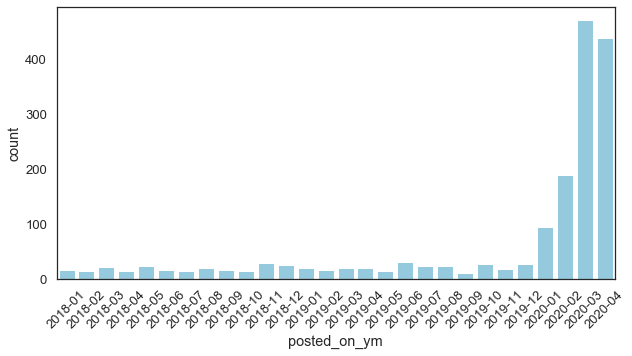

In [59]:
# month-year posted_on actions histogram

since_when = 2018
plt.figure(figsize=(10,5))
chart = sns.countplot(x="posted_on_ym", data=df_alt_to_wiki[df_alt_to_wiki.posted_on_year>=since_when], order=sorted(df_alt_to_wiki[df_alt_to_wiki.posted_on_year>=since_when].posted_on_ym.unique()), color="skyblue")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.show()

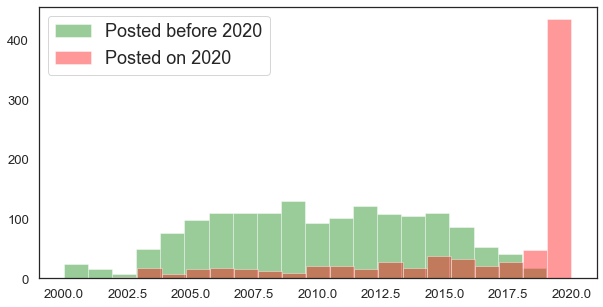

In [60]:
# publication years of articles cited by Wikipedia by posted_on action 
#(i.e., with duplicates for multiple posted_on actions on different Wikipedia pages)

since_when = 2020
from_when = 2000

df_alt_to_wiki_joined_altmetrics = df_alt_to_wiki.merge(df_altmetrics, how="left", left_on="altmetric_id", right_on="altmetric_id")
plt.figure(figsize=(10,5))
sns.distplot([int(l) for l in df_alt_to_wiki_joined_altmetrics[(df_alt_to_wiki_joined_altmetrics.posted_on_year<since_when) & (df_alt_to_wiki_joined_altmetrics.year>=from_when)].year.to_list()], bins=20, color="green", kde=False, label="Posted before %d"%since_when)
chart = sns.distplot([int(l) for l in df_alt_to_wiki_joined_altmetrics[(df_alt_to_wiki_joined_altmetrics.posted_on_year>=since_when) & (df_alt_to_wiki_joined_altmetrics.year>=from_when)].year.to_list()], bins=20, color="red", kde=False, label="Posted on %d"%since_when)
#chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.legend(fontsize=18)
plt.show()

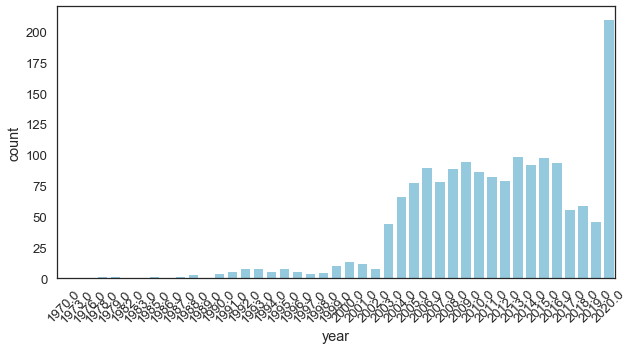

In [61]:
# publication years of articles cited by Wikipedia

plt.figure(figsize=(10,5))
chart = sns.countplot(x="year", data=df_alt_to_wiki_joined_altmetrics.groupby("altmetric_id").first(), color="skyblue")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.show()

In [62]:
# most Wiki cited papers

In [63]:
df_top_cited = df_alt_to_wiki.groupby("doi").agg('count').sort_values('wikipedia_id',ascending=False)[:20]
df_top_cited.reset_index(inplace=True)

In [64]:
df_top_cited[["doi",'wikipedia_id']].merge(df_joined, how="left", right_on="doi", left_on="doi")[["doi",
    "wikipedia_id","title","publication_year","journal","times_cited"]]

,doi,wikipedia_id,title,publication_year,journal,times_cited
0,10.1007/s00705-012-1299-6,18,Ratification vote on taxonomic proposals to th...,2012.0,Arch Virol,206.0
1,10.3390/v2081803,15,Coronavirus Genomics and Bioinformatics Analysis,2010.0,Viruses,96.0
2,10.1007/978-1-4939-2438-7_1,13,Coronaviruses: An Overview of Their Replicatio...,2015.0,Methods in Molecular Biology,128.0
3,10.1016/s0140-6736(20)30183-5,12,Clinical features of patients infected with 20...,2020.0,The Lancet,1307.0
4,10.1083/jcb.148.5.931,10,NaN,NaN,NaN,NaN
5,10.3390/v11020174,10,Global Epidemiology of Bat Coronaviruses,2019.0,Viruses,19.0
6,10.1038/s41422-020-0282-0,10,Remdesivir and chloroquine effectively inhibit...,2020.0,Cell Research,211.0
7,10.1038/d41586-020-00548-w,9,Mystery deepens over animal source of coronavirus,2020.0,Nature,3.0
8,10.1128/jvi.06540-11,9,Discovery of Seven Novel Mammalian and Avian C...,2012.0,Journal of Virology,377.0
9,10.1038/s41586-020-2012-7,9,A pneumonia outbreak associated with a new cor...,2020.0,Nature,501.0


In [65]:
# most citing Wiki articles

In [66]:
df_top_citing = df_alt_to_wiki.groupby("wikipedia_id").agg('count').sort_values('doi',ascending=False)[:20]
df_top_citing.reset_index(inplace=True)

In [67]:
df_top_citing[["altmetric_id",'wikipedia_id']].merge(df_wikipedia, how="left", right_on="wikipedia_id", left_on="wikipedia_id")[["altmetric_id",
    "wikipedia_id","title","page_url","lang","summary"]]

,altmetric_id,wikipedia_id,title,page_url,lang,summary
0,121,63030231,Coronavirus disease 2019,http://en.wikipedia.org/?curid=63030231,en,Recommended measures to prevent infection incl...
1,51,62786585,Severe acute respiratory syndrome coronavirus 2,http://en.wikipedia.org/?curid=62786585,en,Severe acute respiratory syndrome coronavirus ...
2,47,62750956,2019–20 coronavirus pandemic,http://en.wikipedia.org/?curid=62750956,en,The 2019–20 coronavirus pandemic is an ongoing...
3,46,201983,Coronavirus,http://en.wikipedia.org/?curid=201983,en,Coronaviruses are a group of related viruses t...
4,40,63676463,2019–20 coronavirus pandemic/sandbox,http://en.wikipedia.org/?curid=63676463,en,The 2019–20 coronavirus pandemic is an ongoing...
5,31,211547,Severe acute respiratory syndrome-related coro...,http://en.wikipedia.org/?curid=211547,en,Severe acute respiratory syndrome-related coro...
6,27,63435931,COVID-19 drug development,http://en.wikipedia.org/?curid=63435931,en,COVID-19 drug development is the research proc...
7,26,39532251,Middle East respiratory syndrome,http://en.wikipedia.org/?curid=39532251,en,For PCR testing the WHO recommends obtaining s...
8,21,19572217,Influenza,http://en.wikipedia.org/?curid=19572217,en,"Influenza, commonly known as ""the flu"", is an ..."
9,21,4354646,Emergent virus,http://en.wikipedia.org/?curid=4354646,en,An emergent virus is a virus that either has n...


## Scite

In [68]:
df_scite = pd.read_csv("../cord-19/datasets/scite-covid-source-tallies.csv")

In [69]:
df_scite.head()

,doi,total,supporting,contradicting,mentioning,unclassified
0,10.1001/archinte.168.22.2489,120,9,3,108,0
1,10.1001/jama.2010.675,188,31,7,150,0
2,10.1001/jama.2014.2116,9,0,0,9,0
3,10.1001/jama.2016.17324,121,6,6,109,0
4,10.1001/jama.2017.8708,6,1,0,5,0


In [70]:
len(df_scite.doi.unique())

27216

In [71]:
df_joined_t = df_joined.merge(df_scite, how='left', left_on="doi", right_on="doi", copy=False)

In [72]:
df_joined_t.shape

(55875, 29)

In [73]:
df_altmetrics.pmid = pd.to_numeric(df_altmetrics.pmid)

In [74]:
## join with Altmetrics

df_tmp_a = df_altmetrics[pd.isnull(df_altmetrics.doi)] 
df_tmp_j = df_joined_t[pd.isnull(df_joined_t.doi)] 
df_joined_all = df_joined_t[pd.notnull(df_joined_t.doi)].merge(df_altmetrics[pd.notnull(df_altmetrics.doi)], suffixes=('','_y'), how="left", left_on="doi", right_on="doi")
df_joined_all.drop(columns=['pmid_y', 'year_y', 'title_y'],inplace=True)

In [75]:
df_joined_tt = df_tmp_j.merge(df_tmp_a, how="left", suffixes=('','_y'), left_on="pmid", right_on="pmid")
df_joined_tt.drop(columns=["doi_y", 'year_y', 'title_y'],inplace=True)
df_joined_all = pd.concat([df_joined_all,df_joined_tt])
df_joined_all.drop_duplicates("pub_id",inplace=True)
df_joined_all.reset_index(inplace=True,drop=True)

In [76]:
df_joined_all.shape

(55875, 44)

In [77]:
df_joined_all.columns

Index(['pub_id', 'title', 'abstract', 'publication_year', 'publication_month',
       'journal', 'volume', 'issue', 'pages', 'doi', 'pmid', 'pmcid',
       'dimensions_id', 'timestamp', 'id', 'year', 'month', 'publication_date',
       'publication_type', 'issn', 'times_cited', 'relative_citation_ratio',
       'for_top', 'for_bottom', 'total', 'supporting', 'contradicting',
       'mentioning', 'unclassified', 'altmetric_id', 'counts_mendeley',
       'counts_news', 'counts_blogs', 'counts_facebook', 'counts_policy',
       'counts_wikipedia', 'counts_twitter_count', 'counts_twitter_unique',
       'counts_total', 'altmetric_score', 'member_of_the_public', 'researcher',
       'practitioner', 'science_communicator'],
      dtype='object')

In [78]:
df_joined_all[df_joined_all.pub_id==29534]

,pub_id,title,abstract,publication_year,publication_month,journal,volume,issue,pages,doi,...,counts_policy,counts_wikipedia,counts_twitter_count,counts_twitter_unique,counts_total,altmetric_score,member_of_the_public,researcher,practitioner,science_communicator
28496,29534,Clinical Characteristics of Covid-19 in China.,NaN,2020.0,3.0,New England Journal of Medicine,382,NaN,NaN,10.1056/nejmc2005203,...,0.0,0.0,363.0,346.0,367.0,285.0,250.0,46.0,39.0,11.0


In [79]:
df_joined_all["in_wikipedia"] = df_joined_all["counts_wikipedia"]>0

In [80]:
# Profiling

In [81]:
from pandas_profiling import ProfileReport
which_columns = ['publication_year', 'publication_month',
       'journal', 'times_cited', 'relative_citation_ratio',
       'supporting',
       'contradicting', 'mentioning', 
       'counts_mendeley', 'counts_news', 'counts_blogs', 'counts_facebook',
       'counts_policy', 'counts_wikipedia', 'counts_twitter_count',
       'counts_twitter_unique', 'counts_total', 'altmetric_score',
       'member_of_the_public', 'researcher', 'practitioner',
       'science_communicator', 'in_wikipedia']

In [82]:
profile = ProfileReport(df_joined_all[which_columns], title='Pandas Profiling Report', html={'style':{'full_width':True}})

In [83]:
profile.to_widgets()

In [84]:
# save to disk

df_joined_all.to_csv("data/df_joined_all.csv", compression="gzip", index=False)

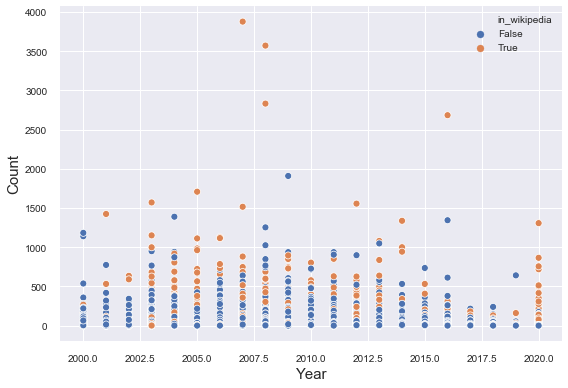

In [85]:
# scatter of citations vs time of publication

since_when = 1999

sns.scatterplot(x='publication_year',y='times_cited', hue='in_wikipedia', data=df_joined_all[df_joined_all.publication_year>since_when])
plt.xlabel("Year", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.tight_layout()
#plt.savefig("figures/dim_citations_year.pdf")

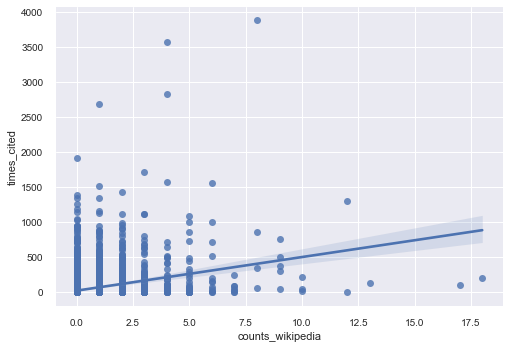

In [86]:
sns.regplot(x='counts_wikipedia', y='times_cited', data=df_joined_all[df_joined_all.publication_year>since_when])

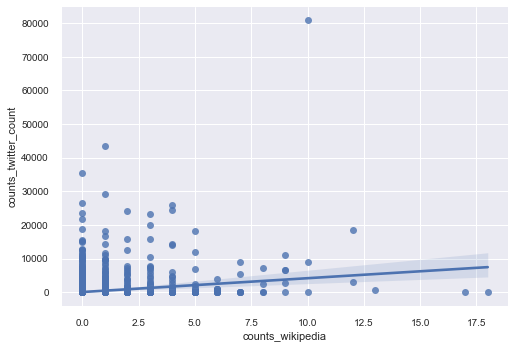

In [87]:
sns.regplot(x='counts_wikipedia', y='counts_twitter_count', data=df_joined_all[df_joined_all.publication_year>since_when])

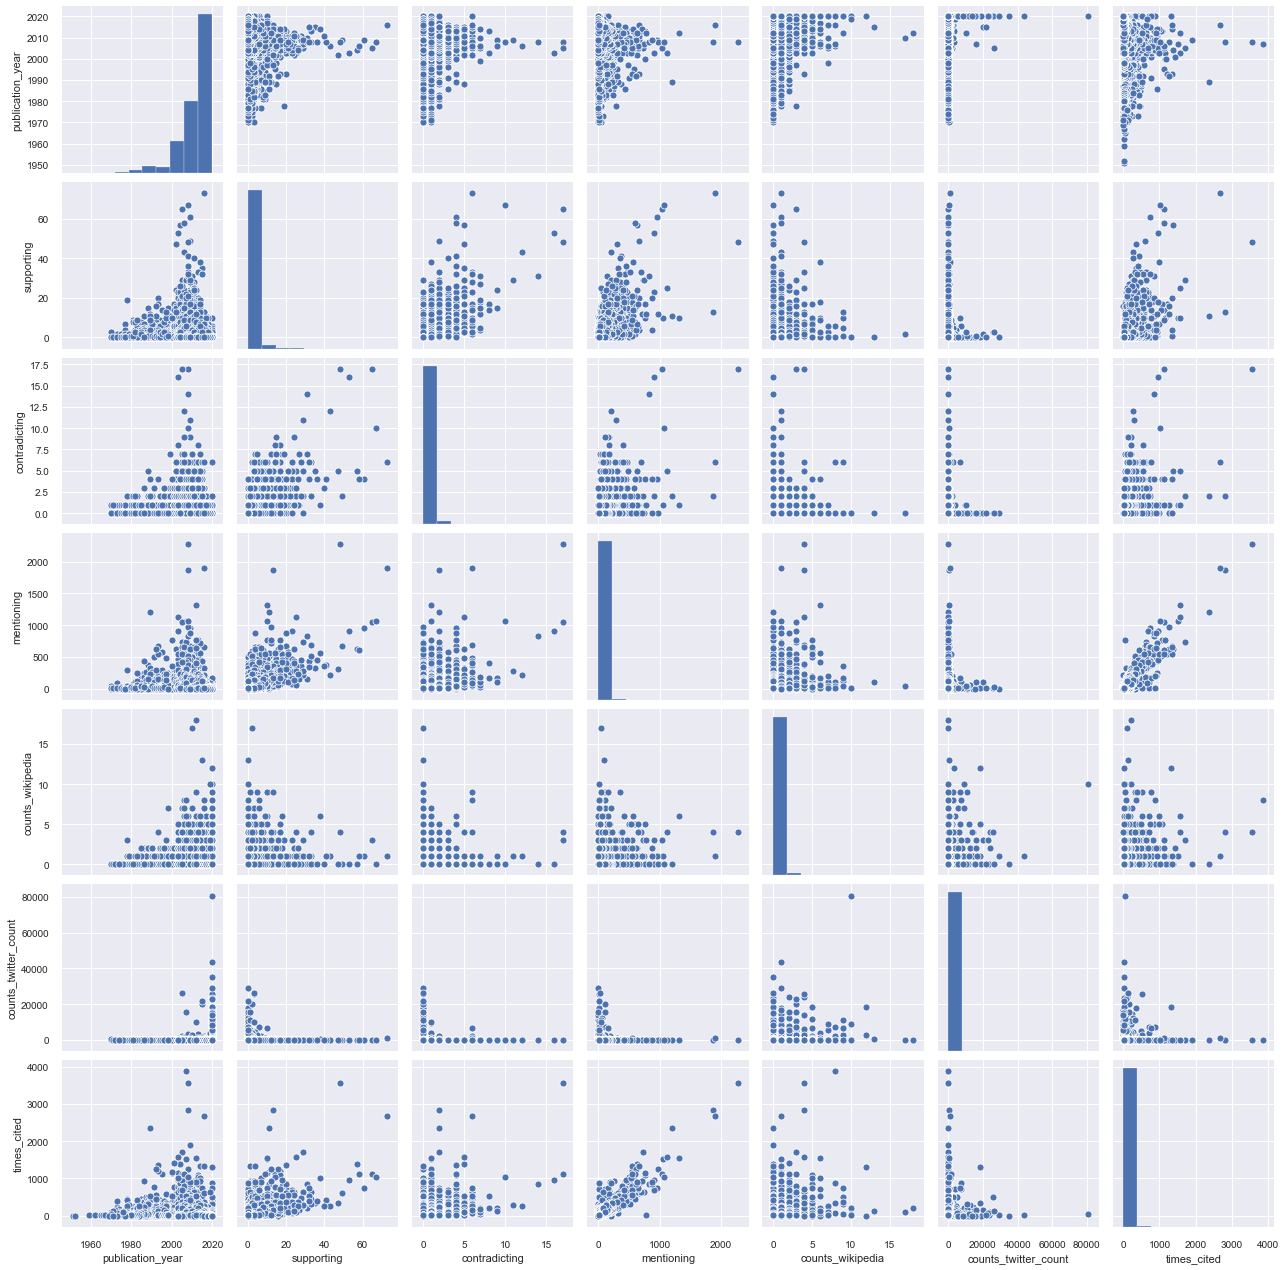

In [88]:
sns.pairplot(df_joined_all[["publication_year","supporting","contradicting","mentioning","counts_wikipedia","counts_twitter_count","times_cited"]]);


In [89]:
# regression experiments

In [90]:
which_columns

['publication_year',
 'publication_month',
 'journal',
 'times_cited',
 'relative_citation_ratio',
 'supporting',
 'contradicting',
 'mentioning',
 'counts_mendeley',
 'counts_news',
 'counts_blogs',
 'counts_facebook',
 'counts_policy',
 'counts_wikipedia',
 'counts_twitter_count',
 'counts_twitter_unique',
 'counts_total',
 'altmetric_score',
 'member_of_the_public',
 'researcher',
 'practitioner',
 'science_communicator',
 'in_wikipedia']

In [148]:
def to_log(n):
    if not n:
        n=0
    return np.log(n+1)

In [149]:
import statsmodels.api as sm
from statsmodels.formula.api import logit

In [150]:
# add default values of zeros

In [162]:
df_reg = df_joined_all[which_columns]
df_reg['in_wikipedia'] = df_reg['in_wikipedia'].astype(int)
df_reg[pd.isnull(df_reg.mentioning)]['mentioning'] = df_reg[pd.isnull(df_reg.mentioning)]['times_cited']
df_reg['times_cited'] = df_reg['times_cited'].apply(to_log)
df_reg['relative_citation_ratio'] = df_reg['relative_citation_ratio']#.apply(to_log)
df_reg['counts_blogs'] = df_reg['counts_blogs'].apply(to_log)
df_reg['counts_mendeley'] = df_reg['counts_mendeley'].apply(to_log)
df_reg['counts_news'] = df_reg['counts_news'].apply(to_log)
df_reg['counts_policy'] = df_reg['counts_policy'].apply(to_log)
df_reg['counts_facebook'] = df_reg['counts_facebook'].apply(to_log)
df_reg['counts_twitter_unique'] = df_reg['counts_twitter_unique'].apply(to_log)
df_reg['supporting_ratio'] = df_reg['supporting']/(df_reg['supporting']+df_reg['mentioning'])
df_reg['contradicting_ratio'] = df_reg['contradicting']/(df_reg['contradicting']+df_reg['mentioning'])
df_reg['researcher_ratio'] = df_reg['researcher']/(df_reg['researcher']+df_reg['member_of_the_public'])
df_reg['science_communicator_ratio'] = df_reg['science_communicator']/(df_reg['science_communicator']+df_reg['member_of_the_public'])
df_reg['expert_ratio'] = (df_reg['researcher']+df_reg['practitioner']+df_reg['science_communicator'])/(df_reg['researcher']+df_reg['practitioner']+df_reg['science_communicator']+df_reg['member_of_the_public'])

In [163]:
regr_columns = [
 'times_cited',
 'relative_citation_ratio',
 'supporting',
 'contradicting',
 'mentioning',
 'counts_mendeley',
 'counts_news',
 'counts_blogs',
 'counts_facebook',
 'counts_policy',
 'counts_wikipedia',
 'counts_twitter_count',
 'counts_twitter_unique',
 'counts_total',
 'altmetric_score',
 'member_of_the_public',
 'researcher',
 'practitioner',
 'science_communicator','supporting_ratio','contradicting_ratio','researcher_ratio','science_communicator_ratio','expert_ratio']

df_reg[regr_columns] = df_reg[regr_columns].fillna(0)

In [164]:
df_reg[df_reg['expert_ratio']>0].shape

(15902, 28)

In [165]:
df_reg.tail()

,publication_year,publication_month,journal,times_cited,relative_citation_ratio,supporting,contradicting,mentioning,counts_mendeley,counts_news,...,member_of_the_public,researcher,practitioner,science_communicator,in_wikipedia,supporting_ratio,contradicting_ratio,researcher_ratio,science_communicator_ratio,expert_ratio
55870,1998.0,7.0,NaN,1.609438,0.18,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
55871,1976.0,10.0,NaN,4.718499,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
55872,1998.0,7.0,NaN,2.197225,1.31,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
55873,1998.0,10.0,NaN,3.367296,2.16,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
55874,1998.0,10.0,NaN,2.484907,0.35,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0


In [166]:
top_journals = df_reg.journal.value_counts()[:20].index
def top_journal(j):
    if j in top_journals:
        return "_".join(j.split())
    return "OTHER"

df_reg["top_j"] = df_reg.journal.apply(top_journal)

In [167]:
df_reg["top_j"].value_counts()

OTHER                             42745
Journal_of_Virology                1758
PLoS_One                           1558
medRxiv                            1227
Virology                            866
SSRN_Electronic_Journal             799
Emerg_Infect_Dis                    737
The_Lancet                          652
Viruses                             577
Arch_Virol                          501
Vaccine                             484
Sci_Rep                             480
Virus_Research                      479
Veterinary_Microbiology             443
Journal_of_Clinical_Virology        393
The_Lancet_Infectious_Diseases      384
Journal_of_Virological_Methods      382
PLoS_Pathog                         357
Virol_J                             356
Antiviral_Research                  352
bioRxiv                             345
Name: top_j, dtype: int64

In [173]:
test_mod = logit("in_wikipedia ~ publication_year + times_cited + counts_mendeley + counts_blogs + counts_policy"
                   "+ counts_twitter_unique + counts_news + counts_facebook + expert_ratio + supporting_ratio + contradicting_ratio"
                  "+ C(top_j)", df_reg).fit()

Optimization terminated successfully.
         Current function value: 0.116922
         Iterations 10


In [174]:
print(test_mod.summary())

                           Logit Regression Results                           
Dep. Variable:           in_wikipedia   No. Observations:                55871
Model:                          Logit   Df Residuals:                    55839
Method:                           MLE   Df Model:                           31
Date:                Wed, 22 Apr 2020   Pseudo R-squ.:                  0.2436
Time:                        09:58:09   Log-Likelihood:                -6532.5
converged:                       True   LL-Null:                       -8636.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                      0.6944      9.873      0.070      0.944     -18.656      20.045
C(top_j)[T.Arch_Virol]             

In [175]:
test_mod.pred_table()

array([[53727.,   140.],
       [ 1806.,   198.]])

In [176]:
mfx = test_mod.get_margeff()
print(mfx.summary())

        Logit Marginal Effects       
Dep. Variable:           in_wikipedia
Method:                          dydx
At:                           overall
                                                dy/dx    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
C(top_j)[T.Arch_Virol]                        -0.0342      0.012     -2.799      0.005      -0.058      -0.010
C(top_j)[T.Emerg_Infect_Dis]                  -0.0270      0.008     -3.468      0.001      -0.042      -0.012
C(top_j)[T.Journal_of_Clinical_Virology]      -0.0361      0.015     -2.456      0.014      -0.065      -0.007
C(top_j)[T.Journal_of_Virological_Methods]    -0.0557      0.018     -3.055      0.002      -0.092      -0.020
C(top_j)[T.Journal_of_Virology]               -0.0164      0.007     -2.363      0.018      -0.030      -0.003
C(top_j)[T.OTHER]                             -0.0218      0.006     -3

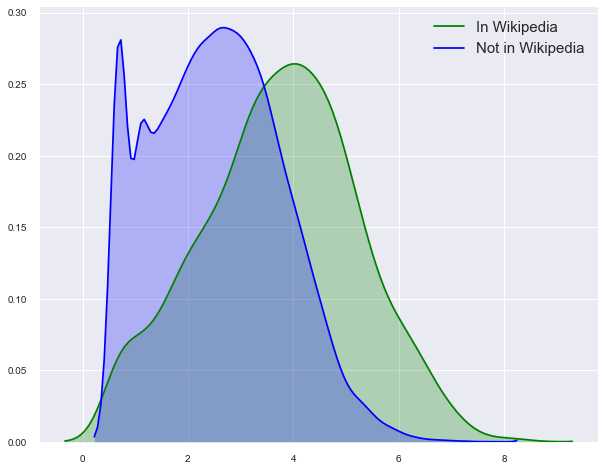

In [177]:
what_to_plot = "times_cited"
plt.figure(figsize=(10,8))
sns.distplot(df_reg[(df_reg.in_wikipedia==1) & (df_reg[what_to_plot]>0)][what_to_plot].values, color="green", kde=True, norm_hist=True, kde_kws={"shade": True}, hist=False, label="In Wikipedia")
sns.distplot(df_reg[(df_reg.in_wikipedia==0) & (df_reg[what_to_plot]>0)][what_to_plot].values, color="blue", kde=True, norm_hist=True, kde_kws={"shade": True}, hist=False, label="Not in Wikipedia")
plt.legend(fontsize=15)

In [276]:
df_reg[df_reg.in_wikipedia==1].expert_ratio.values

array([       nan, 0.33702882, 0.21481118, ...,        nan, 0.4       ,
       0.        ])